<a href="https://colab.research.google.com/github/AgungDaffa/pcvk/blob/main/jobsheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok 2**
1. Brilliyand Noval Herdana Putra (2141720104)
2. Agung Afrizal Daffa (2141720110)
3. Muhammad Islahuddin (2141720268)

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Buat Gamma Correction sesuai dengan petunjuk berikut

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 2


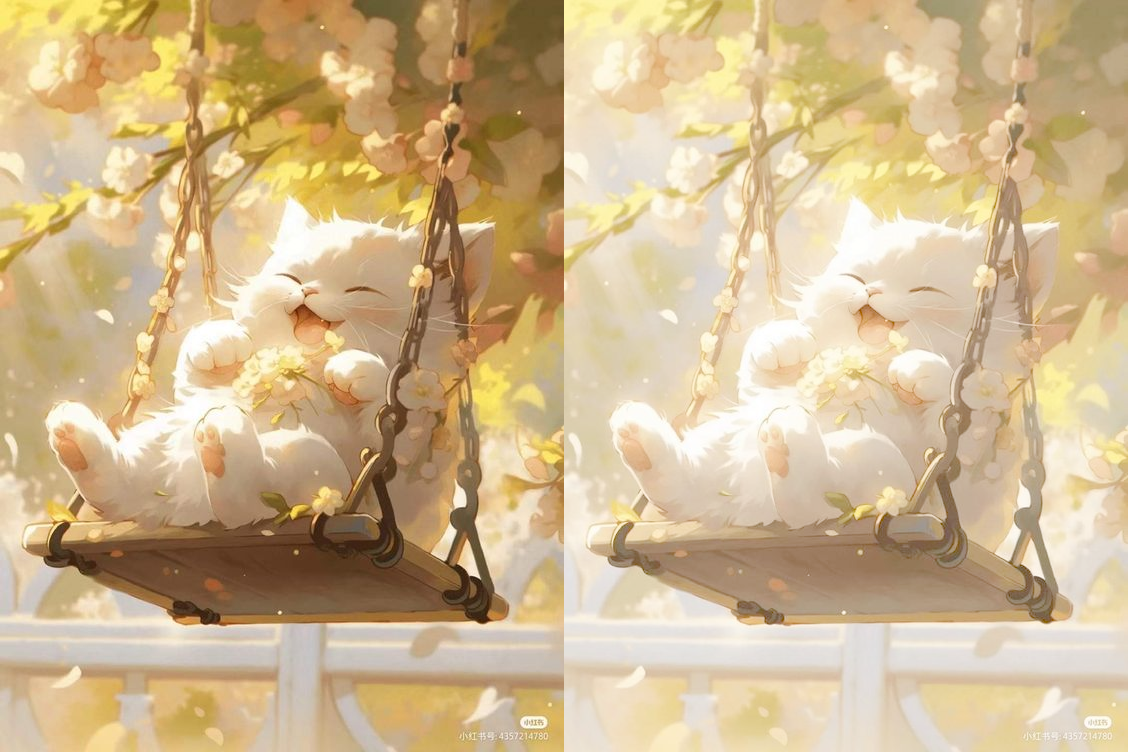

In [3]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/gambar/cat.jpg')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 2


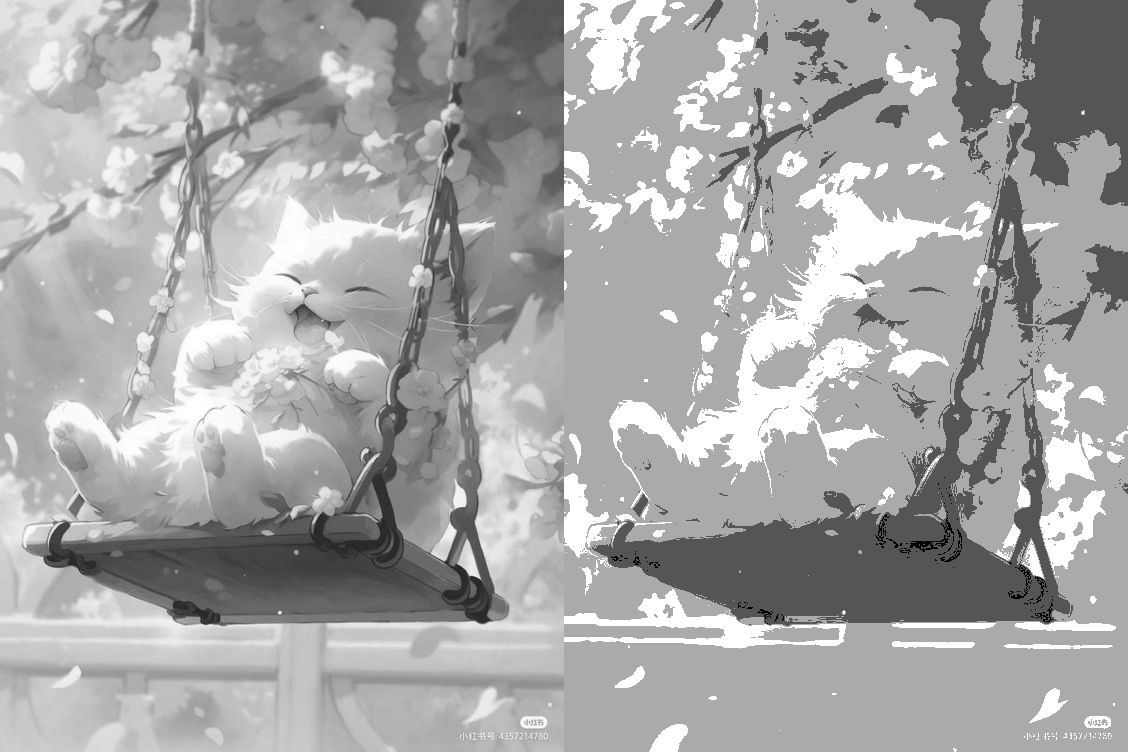

In [4]:
original = cv.imread('/content/drive/MyDrive/gambar/cat.jpg', cv.IMREAD_GRAYSCALE)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    gamma_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


3. Buat modul Average Denoising

In [5]:
import glob

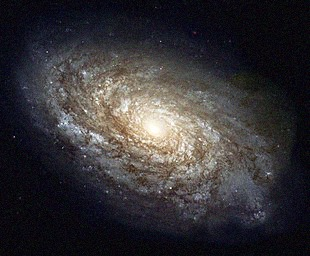

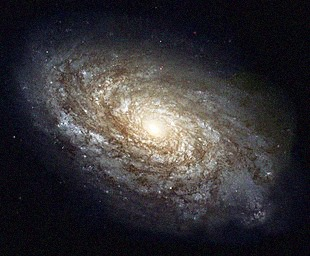

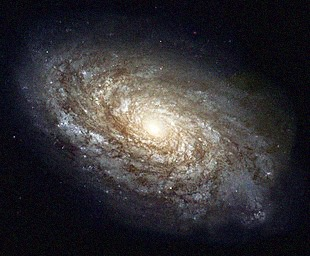

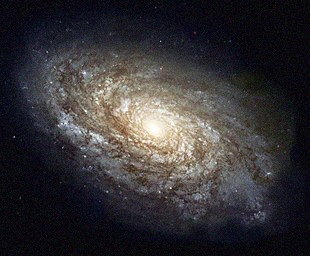

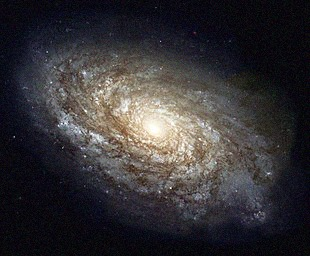

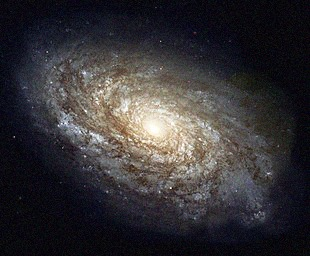

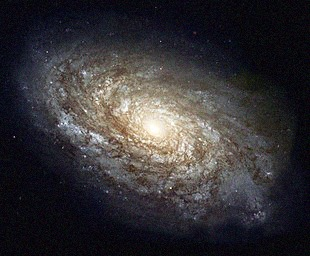

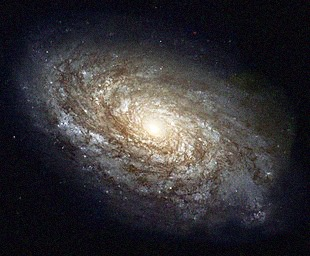

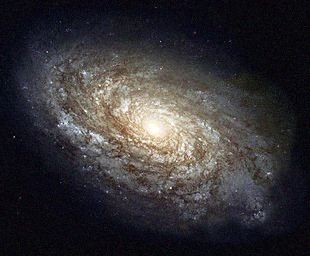

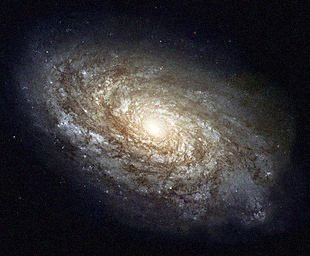

In [6]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import glob

# Membaca citra asli
original_image = cv2.imread('/content/drive/MyDrive/gambar/galaxy.jpeg')

# Membaca semua citra dengan Gaussian Noise dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/gambar/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

# Proses penggabungan citra dengan Gaussian Noise ke citra asli
for noise_image in cv_img:
    # Lakukan penggabungan di sini (contohnya, menambahkan citra asli dan citra dengan noise)
    combined_image = cv2.addWeighted(original_image, 0.7, noise_image, 0.3, 0)

    # Tampilkan atau simpan citra gabungan
    cv2_imshow(combined_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


4. Buat image masking untuk image berikut. Image kiri adalah image asl

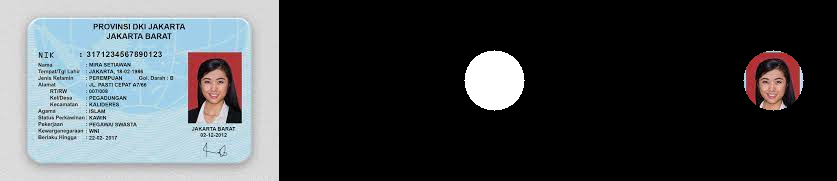

In [7]:
from google.colab.patches import cv2_imshow
image_path = '/content/drive/MyDrive/gambar/download.jpg'
original_image = cv.imread(image_path)

center1 = (215, 80)
radius1 = 30
mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = cv.bitwise_and(original_image, mask)

final_frame = cv.hconcat((original_image, mask,masked_image))
cv2_imshow(final_frame)

5.  Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.


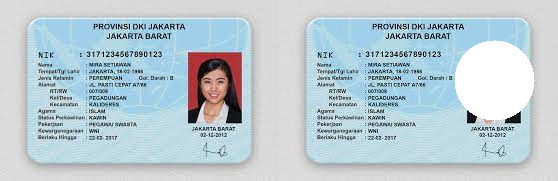

In [8]:
#OR
img_org = cv.imread('/content/drive/MyDrive/gambar/download.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (215,80), 40, (255,255,255), -1)

result = img_org | mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)


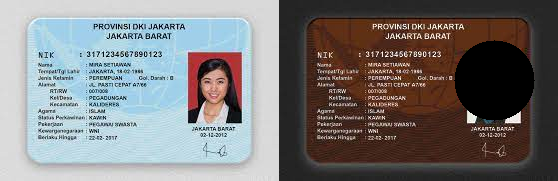

In [9]:
#NOT
img_org = cv.imread('/content/drive/MyDrive/gambar/download.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (215,80), 40, (255,255,255), -1)

result = ~img_org & ~mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

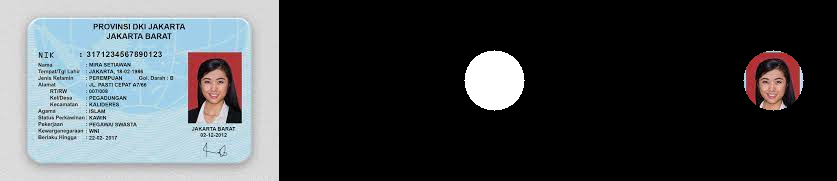

In [10]:
from google.colab.patches import cv2_imshow
image_path = '/content/drive/MyDrive/gambar/download.jpg'
original_image = cv.imread(image_path)

center1 = (215, 80)
radius1 = 30
mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = cv.bitwise_and(original_image, mask)

final_frame = cv.hconcat((original_image, mask,masked_image))
cv2_imshow(final_frame)

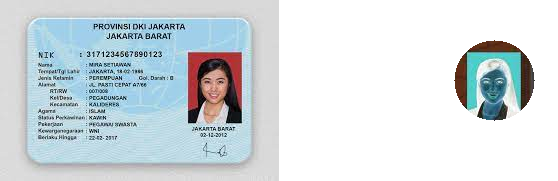

In [11]:
#NAND
img_org = cv.imread('/content/drive/MyDrive/gambar/download.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (215,80), 40, (255,255,255), -1)

result = cv.bitwise_not(cv.bitwise_and(img_org, mask))

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

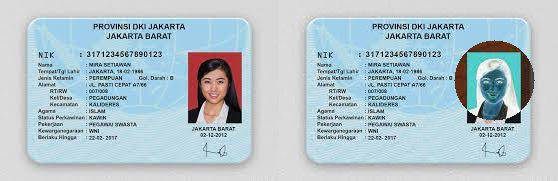

In [12]:
#XOR
img_org = cv.imread('/content/drive/MyDrive/gambar/download.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (215,80), 40, (255,255,255), -1)

result = cv.bitwise_xor(img_org, mask)

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)